# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Yudhistira Aruna Sakti
- Email: satistudia89@mail.com
- ID Dicoding: saktiaru_na

## Menentukan Pertanyaan Bisnis
1. Penjual yang memiliki jumlah penjualan tertinggi?
2. Pelanggan dari kota atau wilayah dengan jumlah pelanggan terbanyak?

In [36]:
# Library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [37]:
# Memuat tabel products

products_df = pd.read_csv("data\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [38]:
# Memuat tabel orders

order_items_df = pd.read_csv("data\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [39]:
# Memuat tabel customers

customers_df = pd.read_csv("data\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data



products_df

In [40]:
# Mengecek tipe-tipe data tiap kolom pada tabel products_df

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
# Mengecek  missing value di dataset products_df

products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Catatan: terdapat banyak missing value yang ditemukan dalam beberapa kolom dalam tabel products_df

In [42]:
# Mengecek duplikasi di dataset products_df

print("Jumlah Duplikasi: ", products_df.duplicated().sum())

Jumlah Duplikasi:  0


Catatan: 0 duplikasi pada tabel products_df

In [43]:
# Mengecek paramater di dataset products_df

products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


order_items_df

In [44]:
# Mengecek tipe-tipe data tiap kolom pada tabel order_items_df

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [45]:
# Mengecek  missing value di dataset order_items_df

order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Catatan: tidak ada missing value pada tabel order_items_df

In [46]:
# Mengecek duplikasi di dataset order_items_df

print("Jumlah Duplikasi: ", order_items_df.duplicated().sum())

Jumlah Duplikasi:  0


Catatan: tidak ada duplikasi pada tabel order_items_df

In [47]:
# Mengecek paramater di dataset order_items_df

order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


customers.df

In [48]:
# Memeriksa tipe-tipe data tiap kolom pada tabel customers_df

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [49]:
# Mengecek  missing value di dataset customers_df

customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Catatan: tidak ada missing value di tabel customers_df

In [50]:
# Mengecek duplikasi di dataset customers_df

print("Jumlah Duplikasi: ", customers_df.duplicated().sum())

Jumlah Duplikasi:  0


Catatan: tidak ada duplikasi pada tabel customers_df

In [51]:
# Mengecek paramater di dataset customers_df

customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Cleaning Data

- Memperbaiki missing value pada dataset products_df dengan cara memberi input
- Mengubah tipe data shipping_limit_date dari "object" ke "datetime"

Memperbaiki missing value

In [52]:
# Mengecek kembali tabel products_df

products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [53]:
# Mengecek jumlah nilai yang ada

products_df.product_category_name.value_counts()


product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [54]:
# Mengisi missing value dengan value dengan jumlah paling banyak

products_df.fillna(value="cama_mesa_banho", inplace=True)

C:\Users\Aruna Sakti\AppData\Local\Temp\ipykernel_14596\459396029.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'cama_mesa_banho' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value="cama_mesa_banho", inplace=True)


In [55]:
# Mengecek kembali missing value

products_df.isna().sum()


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Catatan: sudah tidak ada lagi missing value yang ditemukan

Mengubah tipe data shipping_limit_date "object" ke "datetime"

In [56]:
# Mengubah tipe data shipping_limit_date
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [57]:
# Mengecek perubahan tipe data pada shipping_limit_date

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Explore Dataset products_df

In [58]:
# Rangkuman parameter statistik dari data products_df 

products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,73,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,106392145fca363410d287a815be6de4,cama_mesa_banho,60.0,cama_mesa_banho,1.0,200.0,16.0,10.0,11.0
freq,1,3639,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


Catatan: Produk paling populer adalah cama_mesa_banho dengan jumlah tertinggi sebanyak 3639. 

### Explore Dataset order_items_df

In [59]:
# Rangkuman parameter statistik dari data order_items_df

order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Catatan:
Penjual paling aktif menangani 2033 pesanan.


### Explore Dataset customers_df

In [60]:
# Rangkuman parameter statistik dari data customers_df

customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Catatan: 
- Kota terbanyak: Sao Paulo 15540 pelanggan
- Negara bagian dengan jumlah pelanggan terbanyak adalah SP (Sao Paulo), dengan 41746 pelanggan

## Visualization & Explanatory Analysis

#### 1. Penjual yang memiliki jumlah penjualan tertinggi?

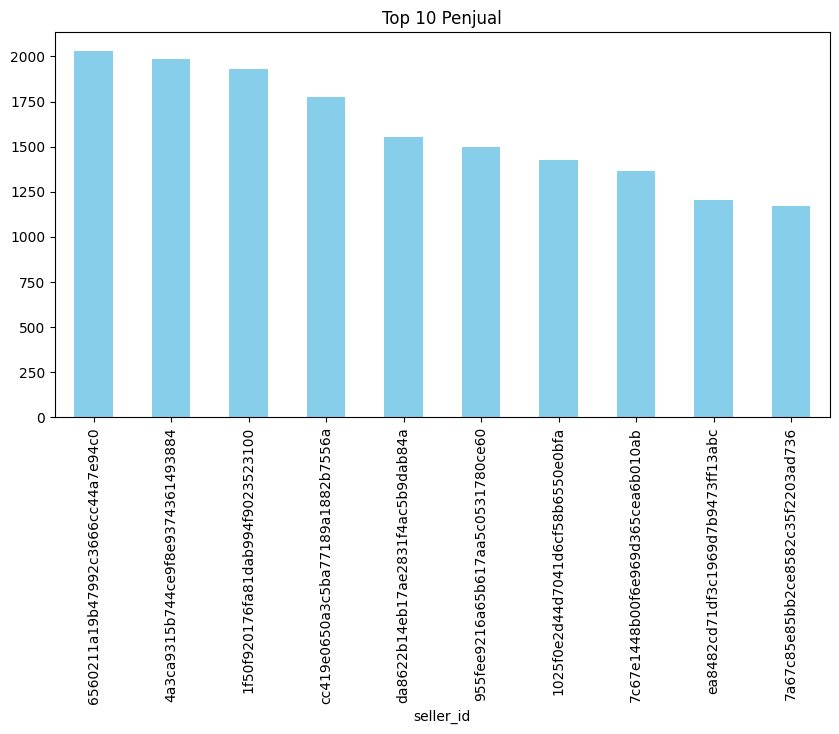

In [61]:
top_sellers = order_items_df["seller_id"].value_counts().head(10)
top_sellers.plot(kind="bar", figsize=(10, 5), color="skyblue", title="Top 10 Penjual")
plt.show()


Catatan: Berdasarkan grafis penjual paling aktif menangani 2033 pesanan.

2. Pelanggan dari kota atau wilayah dengan jumlah pelanggan terbanyak?

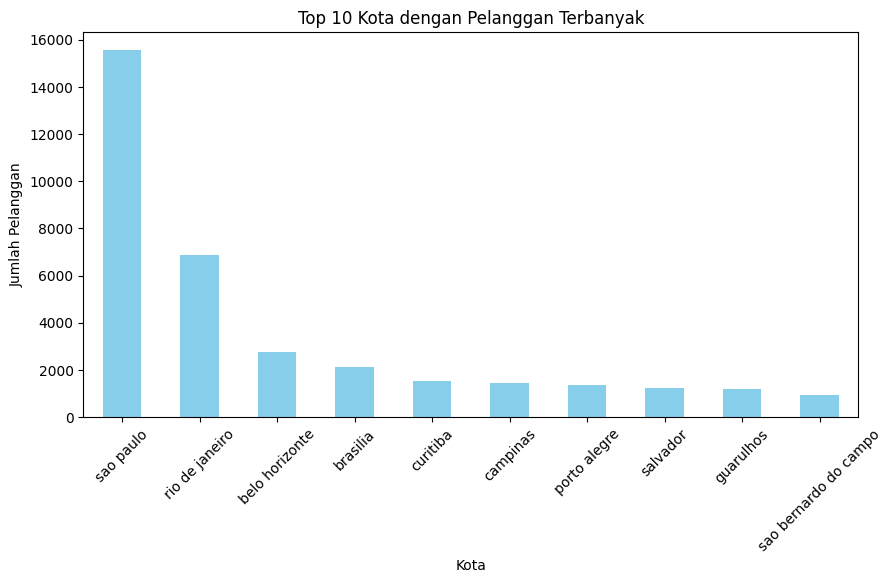

In [62]:
# Top 10 kota dengan pelanggan terbanyak

top_cities = customers_df["customer_city"].value_counts().head(10)

top_cities.plot(kind="bar", figsize=(10, 5), color="skyblue", title="Top 10 Kota dengan Pelanggan Terbanyak")
plt.xlabel("Kota")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.show()

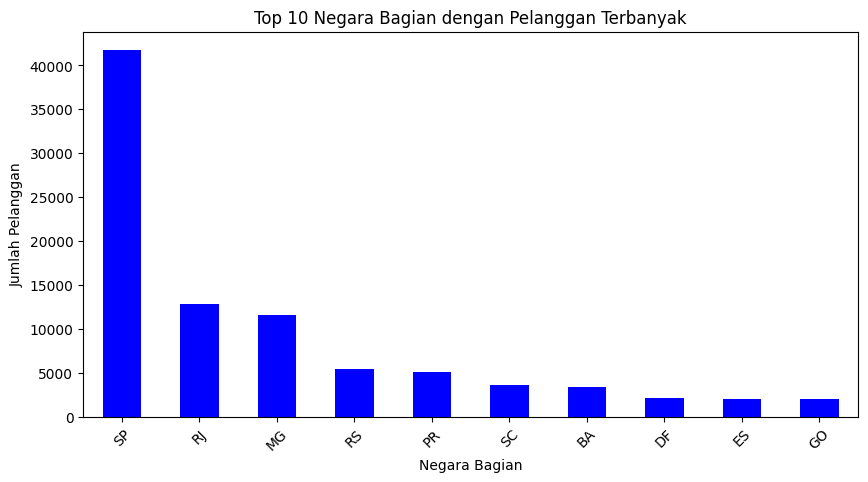

In [ ]:
# Top 10 negara bagian dengan pelanggan terbanyak

top_states = customers_df["customer_state"].value_counts().head(10)

top_states.plot(kind="bar", figsize=(10, 5), color="blue", title="Top 10 Negara Bagian dengan Pelanggan Terbanyak")

plt.xlabel("Negara Bagian")  
plt.ylabel("Jumlah Pelanggan")  
plt.xticks(rotation=45)
plt.show()



Catatan: Sao Paulo menjadi kota dan negara bagian yang memiliki jumlah pelanggan terbanyak

## Kesimpulan

Pertanyaan
1. Penjual yang memiliki jumlah penjualan tertinggi?
3. Pelanggan dari kota atau wilayah dengan jumlah pelanggan terbanyak?

- Kesimpulan 1: berdasarkan grafik data di atas penjual yang memiliki jumlah penjual tertinggi melayani sebanyak 2033 pesanan dengan seller_id="6560211a19b47992c3666cc44a7e94c0".
- Kesimpulan 2: kota dan negara bagian yang berkontribusi dengan pelanggan terbanyak adalah Sao Paulo dengan 15540 untuk kota dan 41746 untuk negara bagian.

Menyimpan data yang telah dibersihkan

In [64]:
products_df.to_csv("products_clean.csv", index=False)

In [65]:
order_items_df.to_csv("order_items_clean.csv", index=False)

In [66]:
customers_df.to_csv("customers_clean.csv", index=False)